<a href="https://www.kaggle.com/code/xcufx0qc2os1/money-pox-eda-and-classification?scriptVersionId=108279139" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/monkeypox-patients-dataset/DATA.csv


# Importing Libraries

In [2]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [3]:
import missingno as msno
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import lazypredict

# Importing the Data

In [4]:
df = pd.read_csv("/kaggle/input/monkeypox-patients-dataset/DATA.csv")

# Exploratory Data Analysis

In [5]:
df.head()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,None,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,None,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive


In [6]:
df.tail()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
24995,P24995,None,True,True,False,True,True,False,False,True,Positive
24996,P24996,Fever,False,True,True,False,True,True,True,True,Positive
24997,P24997,None,True,True,False,False,True,True,False,False,Positive
24998,P24998,Swollen Lymph Nodes,False,True,False,True,True,True,False,False,Negative
24999,P24999,Swollen Lymph Nodes,False,False,True,False,False,True,True,False,Positive


In [7]:
df.shape

(25000, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Patient_ID                      25000 non-null  object
 1   Systemic Illness                25000 non-null  object
 2   Rectal Pain                     25000 non-null  bool  
 3   Sore Throat                     25000 non-null  bool  
 4   Penile Oedema                   25000 non-null  bool  
 5   Oral Lesions                    25000 non-null  bool  
 6   Solitary Lesion                 25000 non-null  bool  
 7   Swollen Tonsils                 25000 non-null  bool  
 8   HIV Infection                   25000 non-null  bool  
 9   Sexually Transmitted Infection  25000 non-null  bool  
 10  MonkeyPox                       25000 non-null  object
dtypes: bool(8), object(3)
memory usage: 781.4+ KB


In [9]:
df.describe().T

,count,unique,top,freq
Patient_ID,25000,25000,P0,1
Systemic Illness,25000,4,Fever,6382
Rectal Pain,25000,2,False,12655
Sore Throat,25000,2,True,12554
Penile Oedema,25000,2,True,12612
Oral Lesions,25000,2,False,12514
Solitary Lesion,25000,2,True,12527
Swollen Tonsils,25000,2,True,12533
HIV Infection,25000,2,True,12584
Sexually Transmitted Infection,25000,2,False,12554


## Missing Data Exploration

In [10]:
for x in df.columns:
    print({x:(df[x].unique())})

{'Patient_ID': array(['P0', 'P1', 'P2', ..., 'P24997', 'P24998', 'P24999'], dtype=object)}
{'Systemic Illness': array(['None', 'Fever', 'Swollen Lymph Nodes', 'Muscle Aches and Pain'],
      dtype=object)}
{'Rectal Pain': array([False,  True])}
{'Sore Throat': array([ True, False])}
{'Penile Oedema': array([ True, False])}
{'Oral Lesions': array([ True, False])}
{'Solitary Lesion': array([False,  True])}
{'Swollen Tonsils': array([ True, False])}
{'HIV Infection': array([False,  True])}
{'Sexually Transmitted Infection': array([False,  True])}
{'MonkeyPox': array(['Negative', 'Positive'], dtype=object)}


<AxesSubplot:>

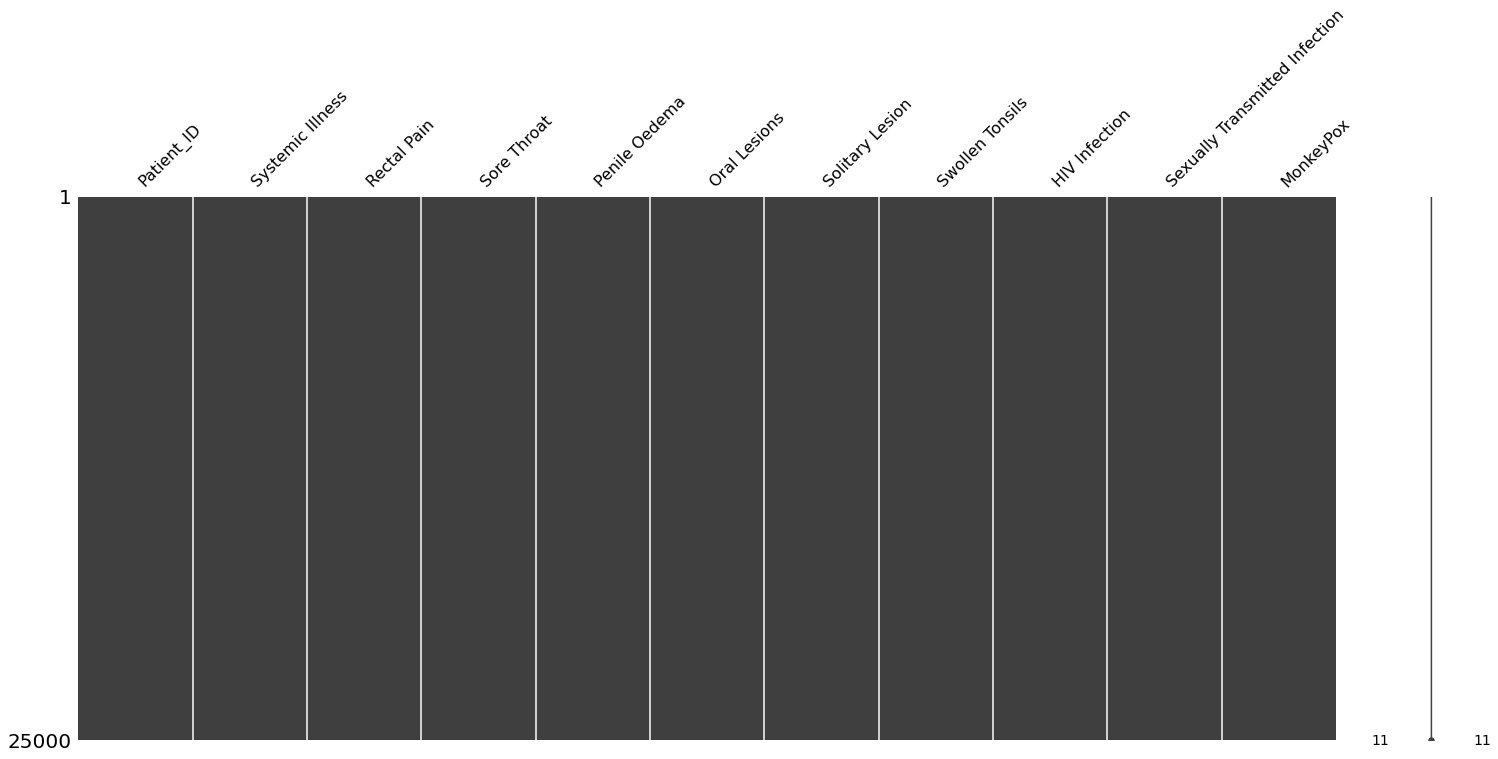

In [11]:
msno.matrix(df)

### **Observation 1**:
    1. There are 25000 patient data in the dataframe
    2. There are no missing data
    3. Except for the patient Id all data are categorical in nature

In [12]:
# Dropping patient ID as it is does not serve any purpose in analysis
df.drop("Patient_ID",axis=1,inplace=True)

## What is the distribution of all the variables under study?

In [13]:
for col in df.columns:
    names = df[col].unique()
    values = df[col].value_counts()
    fig = px.pie(names = names, values= values, title=col.upper())
    fig.update_layout(margin=dict(l=30, r=30, t=30, b=30))
    fig.show()

### **Observation 2**:
    1. All the symptoms have equal distribution in the data expect for our target variable Monekey pox
    2. Monkey pox has only 36.4 % positive and 63.6% negative representation in the data so this variable is leaning to negative side

## How is monkey pox distibuted among all the variables in the study?

In [14]:
for x in df.columns:
    if x != 'MonkeyPox':
        fig = px.histogram(df, x = x ,color='MonkeyPox',title = x.upper() )
        fig.show()
    else:
        continue

### **Observation 3**:
    1.The proportion of money pox among all symptoms appear to be more or less uniform except for systemic illness

## Preprocessing The Data

#### Mapping values as True = 1 and False = 0 for all symptoms

In [15]:
for x in df.columns:
    if df[x].dtype == 'bool':
        df[x] = df[x].replace({"True":1,"False":0}).astype(int)
    else:
        continue

#### Mapping postive =1 and negative = 0 for moneypox

In [16]:
df.MonkeyPox = df.MonkeyPox.map({'Positive':1,'Negative':0})

#### Mapping 'None', 'Fever', 'Swollen Lymph Nodes', 'Muscle Aches and Pain' as 0,1,2 & 3 respectively

In [17]:
df["Systemic Illness"].unique()

array(['None', 'Fever', 'Swollen Lymph Nodes', 'Muscle Aches and Pain'],
      dtype=object)

In [18]:
df["Systemic Illness"] = df["Systemic Illness"].map({'None':0,'Fever':1,'Swollen Lymph Nodes':2,'Muscle Aches and Pain':3})

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Systemic Illness                25000 non-null  int64
 1   Rectal Pain                     25000 non-null  int64
 2   Sore Throat                     25000 non-null  int64
 3   Penile Oedema                   25000 non-null  int64
 4   Oral Lesions                    25000 non-null  int64
 5   Solitary Lesion                 25000 non-null  int64
 6   Swollen Tonsils                 25000 non-null  int64
 7   HIV Infection                   25000 non-null  int64
 8   Sexually Transmitted Infection  25000 non-null  int64
 9   MonkeyPox                       25000 non-null  int64
dtypes: int64(10)
memory usage: 1.9 MB


# **MACHINE LEARNING WITH LazyClassifier**

In [20]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [21]:
y = df["MonkeyPox"]
X = df.drop("MonkeyPox" ,axis = 1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.8,random_state =123)

In [23]:
# Model calling
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

In [24]:
#model training
models,predictions = clf.fit(X_train, X_test, y_train, y_test)


100%|██████████| 29/29 [00:27<00:00,  1.05it/s]


In [25]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 0.69               0.63     0.63      0.67   
LGBMClassifier                     0.68               0.62     0.62      0.66   
NearestCentroid                    0.61               0.61     0.61      0.62   
XGBClassifier                      0.66               0.60     0.60      0.64   
DecisionTreeClassifier             0.62               0.60     0.60      0.63   
ExtraTreesClassifier               0.63               0.60     0.60      0.63   
ExtraTreeClassifier                0.62               0.60     0.60      0.63   
LabelPropagation                   0.65               0.60     0.60      0.64   
GaussianNB                         0.68               0.59     0.59      0.64   
QuadraticDiscriminantAnalysis      0.67               0.59     0.59      0.64   
LabelSpreading              

In [26]:
#sorting models according to time taken
models.sort_values(by = "Time Taken", inplace = True , ascending = False )

In [27]:
fig = px.line(data_frame=models , y = 'Time Taken', markers= True , title= "Time Taken vs Model" )
fig.update_traces(line_color="blue")
fig.update_layout(showlegend = True)
fig.show()

# Final Observation
## AdaBoostClassifier showed 69% accuracy with a time frame of 0.34 sec

# **THANK YOU**